# Sistemas de tempo contínuo

Renato Naville Watanabe

## Preparação do ambiente

In [1]:
import matplotlib.pyplot as plt
import sympy as sym
from sympy.plotting import PlotGrid

Sistemas de tempo contínuo são dispositivos, processos ou objetos que aceitam como entrada um sinal de tempo contínuo e devolvem como sinal de saída um sinal de tempo contínuo.


<img src=Imagens/contsis.png width="400">

Exemplos de sistemas de tempo contínuo são: um circuito RC, um sistema massa-mola, a temperatura de uma sal, entre diversos outros.

Um sistema de tempo contínuo pode ser descrito de diferentes maneiras. Por enquanto usaremos a descrição de equações diferenciais.

## Equações diferenciais

Equações diferenciais são equações que relacionam dois sinais ($x(t)$ e $y(t)$) através de uma expressão algébrica. Essa expressão pode ter valores desses sinais e suas derivadas.

Por exemplo, a seguinte equação diferencial:

$$\frac{dy}{dt} = -0.5y(t)+x(t)$$

Na equação acima $y(t)$ pode representar, por exemplo, uma tensão elétrica em um componente de um circuito elétrico em resposta  à tensão $x(t)$ de um gerador de tensão.

Aqui supõe-se que o aluno já tenha conhecimentos de equações diferenciais, vistos em outras disciplinas (como Equações Diferenciais Ordinárias).

## Propriedades dos sistemas discretos

Os sistemas de tempo discretos podem ter ou não ter as seguintes propriedades.

### Causalidade

Um sistema é **causal** se a sua saída $y(t)$ depende apenas dos valores da entrada e saída até o instante $t$. Por exemplo:

$\frac{dy}{dt} = 0.2y(t) + x(t)$

é um sistema causal.

Se a saída $y(t)$ de um sistema depende de valores da entrada e saída em instantes maiores do que $t$ o sistema é **não-causal**. Por exemplo:

$\frac{dy}{dt} = -5y(t) + x(t+1)$

é um sistema não-causal.


### Memória

Um sistema tem memória se a saída desse sistema no intante $t$ depende de valores do sinal de entrada em valores diferentes de $t$ (passado ou futuro).

Por exemplo, o sistema com a seguinte equação:

$$y(t) = x(t-1)$$

é um sistema com memória. Chamamos os sistemas com memória de **sistemas dinâmicos**.

Um exemplo comum de sistema dinâmico são os sistemas descritos por equações diferenciais. Por exemplo:

$$\frac{dy}{dt} = 0.2y(t) + x(t)$$

é um sistema com memória. Isso pode não estar claro num primeiro momento. Uma maneira de enxergar isso é integrando os dois lados da equação:

$$y(t) = \int_{-\infty}^t0.2y(t)\,dt + \int_{-\infty}^t x(t)\,dt$$

Perceba que a integral pega valores de $x(t)$ e $y(t)$ de $-\infty$ até t. Por isso o sistema tem memória. Sempre que o sistema tiver derivadas (equação diferencial), o sistema tem memória. 

O seguinte sistema:

$$y(t) =0.2x(t) $$

é um sistema sem memória, já que depende apenas do instante atual. Chamamos os sistemas sem memória de **sistemas estáticos**.

### Linearidade


Um **sistema linear** é um sistema que segue o princípio da sobreposição. 

<img src=Imagens/linearcont.png width="800">

Por exemplo, o sistema:

$$y(t) = (t-1)x(t)$$

Podemos usar como entrada, por exemplo, $x_1(t) = t$ e uma outra entrada $x_2(t) = \cos\left(2\pi0.2t\right)$. As saídas deste sistema em cada um dos casos são mostradas abaixo:

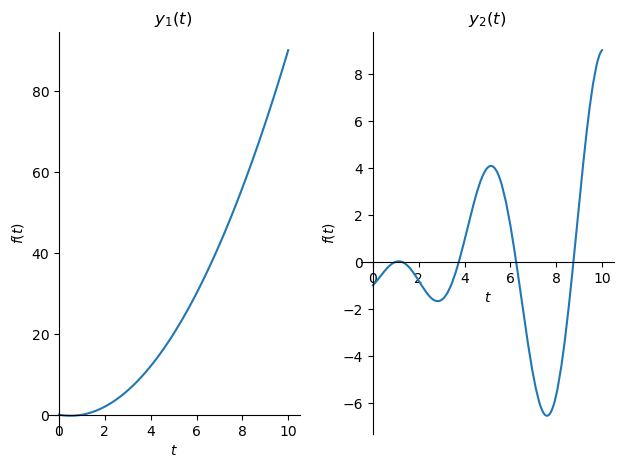

In [2]:
t = sym.symbols('t')
x1 = t
y1 = (t-1)*x1
p1 = sym.plot(y1, (t, 0, 10), show=False, title='$y_1(t)$')
x2 = sym.cos(2*sym.pi*0.2*t)
y2 = (t-1)*x2
p2 = sym.plot(y2, (t, 0,10), show=False, title='$y_2(t)$')
PlotGrid(1, 2, p1, p2)

Podemos agora construir um outro sinal de entrada, $x_3(t) = x_1(t) + x_2(t)$. Se esse sistema for linear, a saída do sistema para essa entrada deverá ser $y_1(t)+y_2(t)$. Abaixo estão os gráficos da saída do sistema para $x_3(t)$ e $y_1(t)+y_2(t)$.

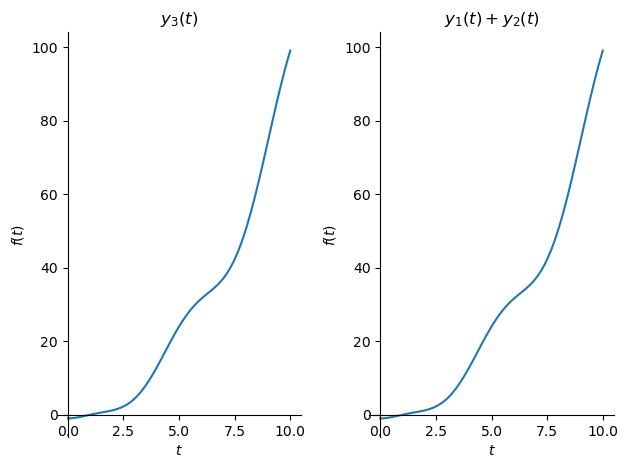

In [3]:
x3 = x1+x2
y3 = (t-1)*x3
p3 = sym.plot(y3, (t, 0, 10), show=False, title='$y_3(t)$')
p4 = sym.plot(y1+y2, (t, 0,10), show=False, title='$y_1(t)+y_2(t)$')
PlotGrid(1, 2, p3, p4)

As saídas são iguais, então concluímos que o sistema é linear.

Caso o sistema não siga o princípio da sobreposição, dizemos que é um **sistema não linear**. Por exemplo, o sistema:

$$y(t) = x(t)^3$$

Podemos usar como entrada, por exemplo, $x_1(t) = t$ e uma outra entrada $x_2(t) = \cos\left(2\pi0.2t\right)$. As saídas deste sistema em cada um dos casos são mostradas abaixo:

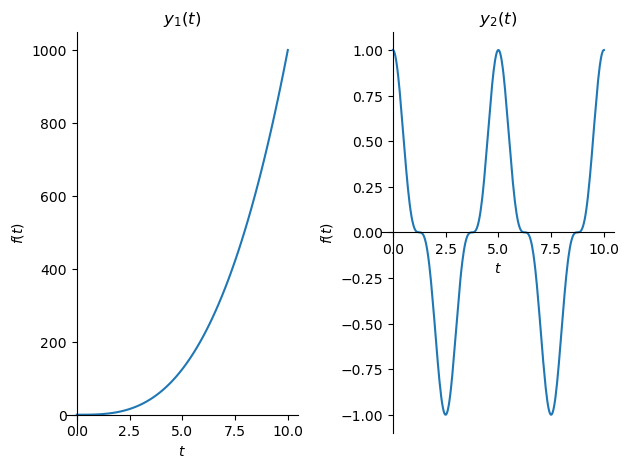

In [4]:
x1 = t
y1 = x1**3
p1 = sym.plot(y1, (t, 0, 10), show=False, title='$y_1(t)$')
x2 = sym.cos(2*sym.pi*0.2*t)
y2 = x2**3
p2 = sym.plot(y2, (t, 0,10), show=False, title='$y_2(t)$')
PlotGrid(1, 2, p1, p2)

Agora, usando a entrada $x_3(t) = x_1(t)+x_2(t)$, se o sistema for linear, a saída do sistema deve ser $y_1(t)+y_2(t)$. Abaixo são mostradas a saída $y_3(t)$ e $y_1(t)+y_2(t)$.

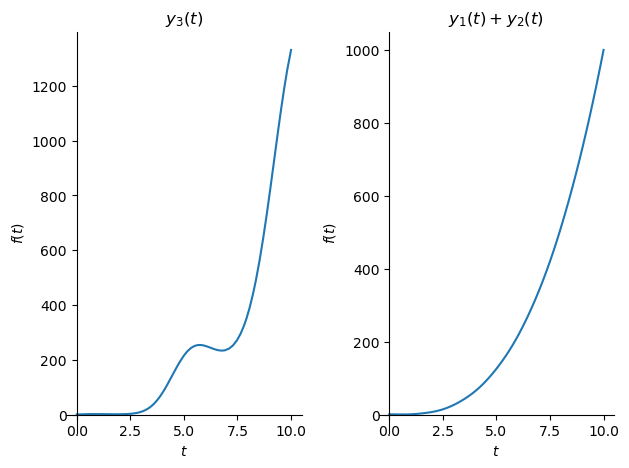

In [5]:
x3 = x1+x2
y3 = x3**3
p3 = sym.plot(y3, (t, 0, 10), show=False, title='$y_3(t)$')
p4 = sym.plot(y1+y2, (t, 0,10), show=False, title='$y_1(t)+y_2(t)$')
PlotGrid(1, 2, p3, p4)

Como é possível observar pelos gráficos $y_3(t)\neq y_1(t)+y_2(t)$ e portanto o sistema é não linear.

### Invariância no tempo

Um sistema é dito ser **invariante no tempo** se colocarmos a mesma entrada em momentos diferentes, as saídas obtidas serão as mesmas, exceto pela diferença no tempo.

<img src=Imagens/ITsiscont.png width="800">

Um sistema que não segue essa propriedade é dito ser **variante no tempo**.

Por exemplo, vamos considerar o sistema que calcula o módulo da entrada $x(t)$:

$$y(t) = |x(t)|$$

Considere o seguinte par de entrada e saída deste sistema, mostrados nos gráficos abaixo:


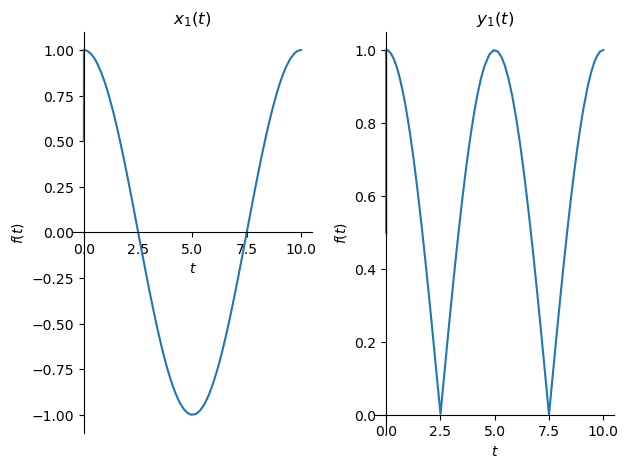

In [6]:
x1 = sym.cos(2*sym.pi*0.1*t)*sym.Heaviside(t)
y1 = sym.Abs(x1)
p1 = sym.plot(x1, (t, 0, 10), show=False, title='$x_1(t)$')
p2 = sym.plot(y1, (t, 0,10), show=False, title='$y_1(t)$')
PlotGrid(1, 2, p1, p2)

Agora vamos colocar a mesma entra entrada, porém atrasada de 1 segundo ($x_2(t) = x_1(t-1)$).

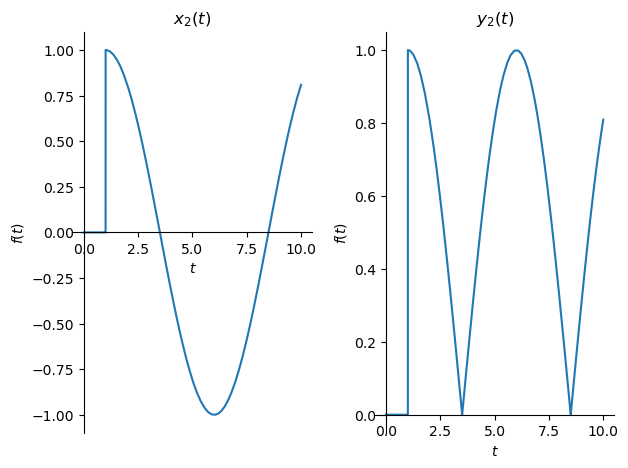

In [7]:
x2 = sym.cos(2*sym.pi*0.1*(t-1))*sym.Heaviside(t-1)
y2 = sym.Abs(x2)
p1 = sym.plot(x2, (t, 0, 10), show=False, title='$x_2(t)$')
p2 = sym.plot(y2, (t, 0,10), show=False, title='$y_2(t)$')
PlotGrid(1, 2, p1, p2)

Podemos observar que a saída $y_2(t)$ é igual a $y_1(t)$, porém atrasado de 1 segundo. Isso acontece porque esse sistema é invariante no tempo.

Vamos pegar outro exemplo de sistema:

$$y(t) = tx(t)

Considere o seguinte par de entrada e saída deste sistema, mostrados nos gráficos abaixo:

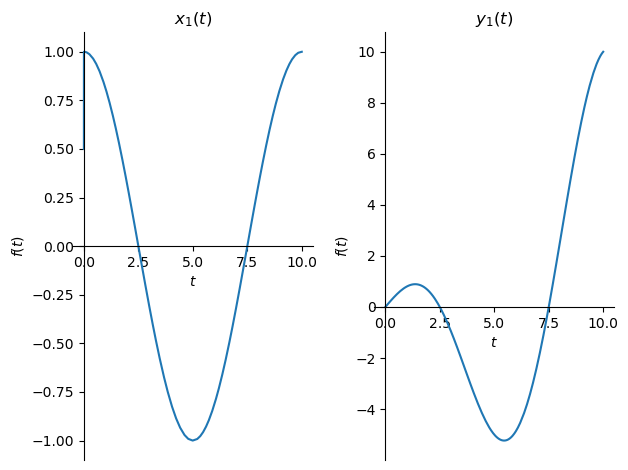

In [8]:
x1 = sym.cos(2*sym.pi*0.1*t)*sym.Heaviside(t)
y1 = t*x1
p1 = sym.plot(x1, (t, 0, 10), show=False, title='$x_1(t)$')
p2 = sym.plot(y1, (t, 0,10), show=False, title='$y_1(t)$')
PlotGrid(1, 2, p1, p2)

Agora vamos colocar a mesma entra entrada, porém atrasada de 2 segundos ($x_2(t) = x_1(t-2)$).

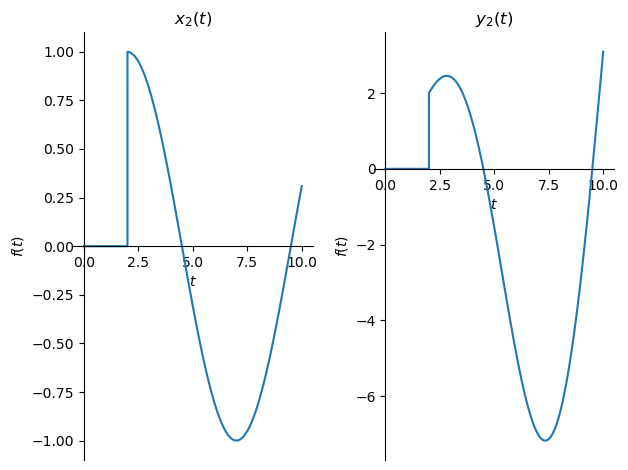

In [9]:
x2 = sym.cos(2*sym.pi*0.1*(t-2))*sym.Heaviside(t-2)
y2 = t*x2
p1 = sym.plot(x2, (t, 0, 10), show=False, title='$x_2(t)$')
p2 = sym.plot(y2, (t, 0,10), show=False, title='$y_2(t)$')
PlotGrid(1, 2, p1, p2);

Podemos observar que a saída $y_2(t)$ não é igual a $y_1(t)$ atrasado de 1 segundo. Ela tem uma outra forma. Isso acontece que porque esse sistema é variante no tempo.

### Estabilidade

O conceito de estabilidade é bem importante e será explorado bastante ao longo do curso, bem como em outros cursos (particularmente em disciplinas que envolvam Controle). Intuitivamente, o conceito um sistema instável é um sistema cuja saída se descontrola (aumenta ou diminui de forma indefinida) mesmo com uma entrada pequena, ou que não cresça para sempre. Por exemplo, um sistema acumulador (que soma todos os valores que recebe como entrada), mesmo se recebe como entrada um sinal que não vai para o infinito (como um degrau), a saída aumenta indefinidamente:

$$y(t) = \int_{-\infty}^t x(t)\,dt $$

Se usarmos o sinal degrau ($u(t) = 1$, para $t\geq0$ e 0 caso contrário) como entrada, a sua saída tem o seguinte gráfico:

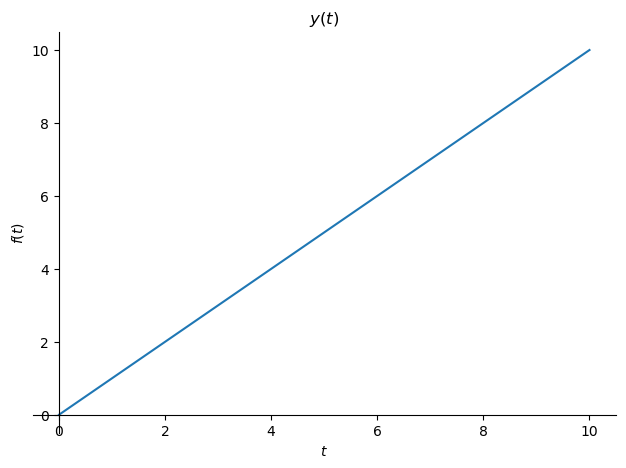

In [10]:
y2 = t
sym.plot(y2, (t, 0, 10), show=True, title='$y(t)$')

Pode-se observar que ela cresce indefinidamente. Isso caracteriza o sistema como instável (geralmente o sistema ser instável é uma característica ruim, que os sistemas de Controle tentam resolver).

Formalmente, podemos definir um **sistema estável** como sendo um sistema que se receber uma entrada finita:

$$|x(t)| < B \text{ ,para qualquer } t $$

em que $B$ é um número real finito, então:

$$|y(t)| < L \text{ .para qualquer } t$$

em que $L$ é um outro número real finito.

Um sistema que não respeita o critério acima é chamado de **sistema instável**.

Um exemplo de sistema estável é o que tem a seguinte equação:

$$y(t) = e^{x(t)} $$

Se usarmos o sinal $x(t) = \cos(t)$ como entrada deste sistema, a saída terá o seguinte gráfico:

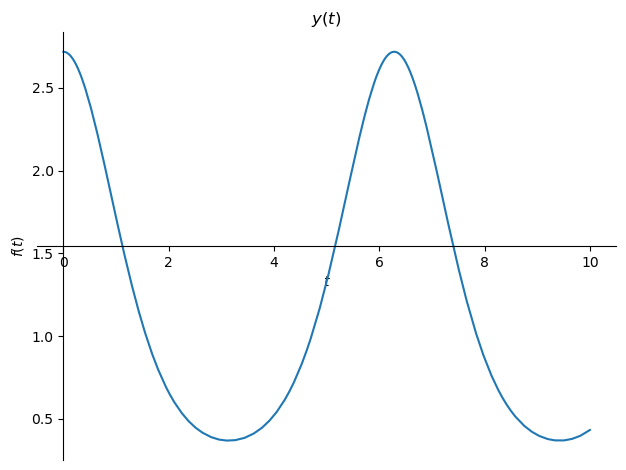

In [11]:
x = sym.cos(t)
y = sym.exp(x)
sym.plot(y, (t, 0, 10), show=True, title='$y(t)$')

Para esse sistema, não existe entrada que tenha seu móduo limitado que vá para o infinito, e portanto o sistema é estável.

Como uma última nota a respeito de estabilidade, o critério mostrado acima é apenas uma maneira de definir estabilidade, conhecido como **BIBO** (*Bounded Input Bounded Output*, Entrada Limitada, Saída Limitada). Existem outros critérios, como a definição de Lyapunov ou estabilidade assintótica,  normalmente vistos em disciplinas de Controle. Neste curso, sempre que for mencionado estabilidade, será de acordo com o critério BIBO.

### Invertibilidade

Um sistema é dito ser um **sistema invertível** se para entradas diferentes o sistema gera saídas diferentes. Caso o sistema seja invertível é possível encontrar o seu **sistema inverso**. Se usarmos como entrada de um sistema inverso do sistema S1 a saída do sistema S1 $y(t)$ devemos obter a entrada $x(t)$.

<img src=Imagens/inversesiscont.png width="800">

Por exemplo, o sistema acumulador:

$$\frac{dy}{dt} = -0.4y(t) + \frac{dx}{dt}$$

Temos como sistema inverso:

$$\frac{dy}{dt} = 0.4x(t) + \frac{dx}{dt}$$

Para obter esse sistema, basta isolar a derivada de $x(t)$ e trocar os os nomes de $x$ e $y$ (apenas para manter o padrão de usar $x$ como entrada e $y$ como saída).


Um outro exemplo é o sistema abaixo:

$y(t) = x(t)^2$

Esse é um **sistema não invertível**. Podemos deduzir isso observando que a entrada $x_1(t)=u(t)$ e a entrada $x_2(t)=-u(t)$ geram a mesma saída.


## Sistemas que serão estudados no restante do curso

O restante do curso se restringirá à classe de sistemas **lineares** e **invariantes no tempo** (às vezes se usa a sigla **SLIT**). Essa restrição acontece por dois principais motivos:

- a maioria dos sistemas encontrados em Engenharia tem essa característica (ou podem ser simplificados para podermos considerar que eles têm essa característica).

- existem muitos métodos para tratar esses sistemas. São esses métodos que veremos ao longo do curso.

Alem disso, a maioria dos sistemas que veremos serão **causais** (já que a maioria dos sistemas encontrados na prática são causais), embora os métodos vistos também funcionem para sistemas não causais.

É muito importante saber definir o sistema com o qual se está trabalhando. Se não for um sistema linear e invariante no tempo, os métodos que aprenderemos no curso não funcionarão.

Os sistemas discretos que sempre são lineares e invariantes no tempo têm a seguinte forma:

$$\displaystyle\sum_{i=0}^N a_i\frac{d^iy}{dt^i} = \displaystyle\sum_{i=0}^N b_i\frac{d^ix}{dt^i}$$

com os parâmetros $a_i$ e $b_i$ sendo constantes.

## Exercícios

**1)** Considere um sistema com a seguinte relação entrada-saída:

$$y(t) = x(\cos(t))$$

a) O sistema é causal?

b) O sistema é linear?

**2)** Determine quais propriedades (linear, invariante no tempo, dinâmico, causal e estável) os sistemas abaixo têm.

a) $y(t) = t^2x(t-0.5)$

b) $y(t) = x(t-1.5)+x(1.5-t)$

c) $y(t) = \mathrm{sen}(2t)x(t)$

d) $y(t) = \int_{-\infty}^{3t}x(\tau)\,d\tau$

e) $y(t) = \left\{\begin{array}{cc}0& ,t<0\\x(t)+x(t-2)& ,t\geq 0 \end{array}\right.$

f) $y(t) = \left\{\begin{array}{cc}0& ,x(t)<0\\x(t)+x(t-2)& ,x(t)\geq 0 \end{array}\right.$

g) $y(t) = x\left(\frac{t}{2}\right)$

h) $y(t) = \frac{dx(t)}{dt}$

**3)** Determine se os seguintes sistemas são invertíveis. Se não forem, mostre dois sinais de entrada que resultem na mesma saída.

a) $y(t) = x(t-4)$

b) $y(t) = \mathrm{sen}(x(t))$

c) $y(t) = \int_{-\infty}^tx(\tau)\,d\tau$

d) $y(t) = \int_{-\infty}^tx(\tau)e^{-(t-\tau)} \, d\tau$

e) $y(t) = \frac{dx}{dt}$

f) $y(t) = x(3t)$

**4)** Considere o seguinte par de entrada saída de um sistema linear e invariante no tempo.

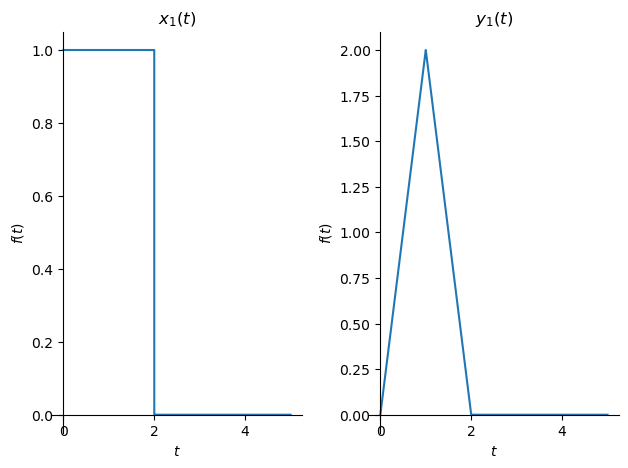

In [12]:
t=sym.symbols('t')
x = sym.Piecewise((1, (t >= 0) & (t < 2)),
                  (0, True))

y = sym.Piecewise((2*t, (t >= 0) & (t < 1)),
                  (4-2*t, (t >= 1) & (t < 2)),
                  (0, True))

p1 = sym.plot(x, (t, 0, 5), show=False, title='$x_1(t)$')
p2 = sym.plot(y, (t, 0, 5), show=False, title='$y_1(t)$')
PlotGrid(1, 2, p1, p2)


Se possível, determine a saída desse sistema para as entradas $x_2(t)$ e $x_3(t)$. Esboce essas saídas.

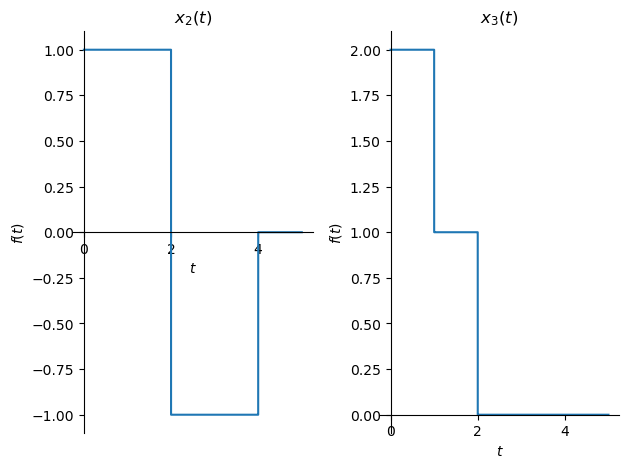

In [13]:
x2 = sym.Piecewise((1, (t >= 0) & (t < 2)),
                   (-1, (t >= 2) & (t < 4)),
                   (0, True))

x3 = sym.Piecewise((1, (t >= -1) & (t < 0)),
                   (2, (t >= 0) & (t < 1)),
                   (1, (t >= 1) & (t < 2)),
                   (0, True))

p1 = sym.plot(x2, (t, 0, 5), show=False, title='$x_2(t)$')
p2 = sym.plot(x3, (t, 0, 5), show=False, title='$x_3(t)$')
PlotGrid(1, 2, p1, p2)

**5)** Abaixo são mostradas as equações diferenciais de alguns sistemas. Determine quais são lineares, quais são invariantes no tempo e quais são lineares e invariantes no tempo. 

a) $\frac{dy}{dt} = -3y(t)+x^2(t)$

b) $\frac{dy}{dt} = -2t^2y(t) + tx(t)$

c) $3y(t) = x(t)-2$

d) $\frac{dy}{dt} = x(t) + y^2(t)$


e) $\left(\frac{dy}{dt}\right)^2 = x(t)-2y(t)$

**6)** Abaixo são mostradas as equações diferenciais de alguns sistemas. Determine quais são lineares, quais são invariantes no tempo e quais são lineares e invariantes no tempo. 

a) $y(t) = x(t-3)$

b) $y(t) = \int_{-3}^3x(\tau)\,d\tau$

c) $y(t) = \left(\frac{dx}{dt}\right)^3$

d) $\frac{dy}{dt} = -2y(t)+x(t)\frac{dx}{dt}$

e) $y(t) = tx(t-2)^2$

f) $y(t) = \int_{-\infty}^tx(\tau)\,d\tau$

**7)** Considere o sistema dado pela seguinte expressão:

$y(t) = \frac{\int_{-\infty}^\infty x(\tau)(\delta(t-\tau) - \delta(t+\tau))\,d\tau}{2}$

a) O que esse sistema faz?

b) O sistema é causal?

c) O sistema é estável?

d) O sistema é linear?

e) O sistema tem memória?

Justifique todas as suas respostas.

**8)** Considere o seguinte sistema: 

$y(t) = \left\{\begin{array}{cc}x(t) &, t\geq 0\\0 & t<0 \end{array}\right.$

Quais propriedades o sistema acima tem? Justifique todas as suas respostas.

**9)** Considere o seguinte sistema (ele é conhecido como Unidade Retificadora Linear em aprendizagem de máquinas, normalmente sendo usado a sigla ReLU): 

$y(t) = \left\{\begin{array}{cc}x(t) &, x(t)\geq 0\\0 & x(t)<0 \end{array}\right.$

Quais propriedades o sistema acima tem? Justifique todas as suas respostas.

Esse sistema é linear?

## Referências

- Oppenheim, M. e Willsky, S.,  Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007

## Solução dos exercícios

1) Resolvido por Catherine.

**a) Causalidade:**

$y(t) = x(\cos(t))$

A saída $y(t)$ depende do valor da entrada $x(\cos(t))$ no instante $t$, portanto é um sistema não causal.

**b) Linearidade:**

A combinação linear das entradas seria $ax_1(t) + bx_2(t)$, e a saída correspondente a essa combinação linear seria:

$ay_1(t) + by_2(t) = ax_1(\cos(t)) + bx_2(\cos(t))$

Verificando se é igual a $y(t) = x(\cos(t))$:

$ax_1(\cos(t)) + bx_2(\cos(t)) = x(\cos(t))$

Como a igualdade não é verdadeira, o sistema não é linear.

5) Resolvido por Catherine.


**a)** $\frac{dy}{dt} = -3y(t)+x^2(t)$

Esta equação não é linear, pois contém um termo $(x^2(t)$) que é não linear em relação à entrada $(x(t)$).

Não é invariante no tempo, pois o termo $(x^2(t)$) depende do tempo $(t$).

**b)** $\frac{dy}{dt} = -2t^2y(t) + tx(t)$

Esta equação é linear, pois todas as variáveis  são elevadas à primeira potência e multiplicadas por funções de $(t$).

Não é invariante no tempo, porque o termo $(tx(t)$) contém o tempo $(t$).

**c)** $3y(t) = x(t)-2$

Esta equação é não-linear, pela constante -2 que aparece sozinha na equação.

Esta equação é invariante no tempo, pois não há termos dependentes do tempo $(t$) em nenhum dos lados da equação.

**d)** $\frac{dy}{dt} = x(t) + y^2(t)$

Esta equação não é linear, porque contém um termo $(y^2(t)$) que é não linear em relação à variável dependente $(y(t)$).

Não é invariante no tempo, porque o termo $(y^2(t)$) depende do tempo $(t$).

**e)** $\left(\frac{dy}{dt}\right)^2 = x(t)-2y(t)$

Esta equação não é linear, pois contém um termo $((\frac{dy}{dt})^2$) que é não linear em relação à variável dependente $(y(t)$).

Não é invariante no tempo, porque o termo $((\frac{dy}{dt})^2$) contém a derivada $(\frac{dy}{dt}$), que depende do tempo $(t$).



9) Realizado por Catherine.

$y(t) = \left\{\begin{array}{cc}x(t) &, x(t)\geq 0\\0 & x(t)<0 \end{array}\right.$

- Linearidade: O sistema não é linear, já que a parte negativa da entrada é mapeada para zero.
- Invariância no tempo: O sistema é invariante no tempo, pois o comportamento do sistema não muda com o tempo.
- Dinâmico: O sistema não é dinâmico, pois a saída depende das entradas no próprio instante.
- Causal: O sistema é causal, pois a saída depende apenas das entradas em instantes anteriores.
- Estável: O sistema é estável, pois não há comportamento explosivo ou crescente na saída.
- Invertibilidade: O sistema não é invertível, pois valores negativos na entrada são mapeados para zero na saída.